The code below shows how to do a simple moving average smoothing for the number of female births over a period of time.

In [0]:
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials
# Authenticate and create the PyDrive client.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

Run the above code to get a link that you can use to access your the google drive.

In [0]:
import pandas as pd
from matplotlib import pyplot as plt
from matplotlib.ticker import MultipleLocator, FormatStrFormatter



downloaded = drive.CreateFile({'id':'1V5ONam3aM_TdOF7mNSrhjmCp2P6YADgX'}) 
downloaded.GetContentFile('daily_female_births.csv')  
series = pd.read_csv('daily_female_births.csv',encoding = "utf-8",header=0, index_col=0)

1959-01-01 00:00:00


/usr/local/lib/python3.6/dist-packages/pandas/plotting/_matplotlib/converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


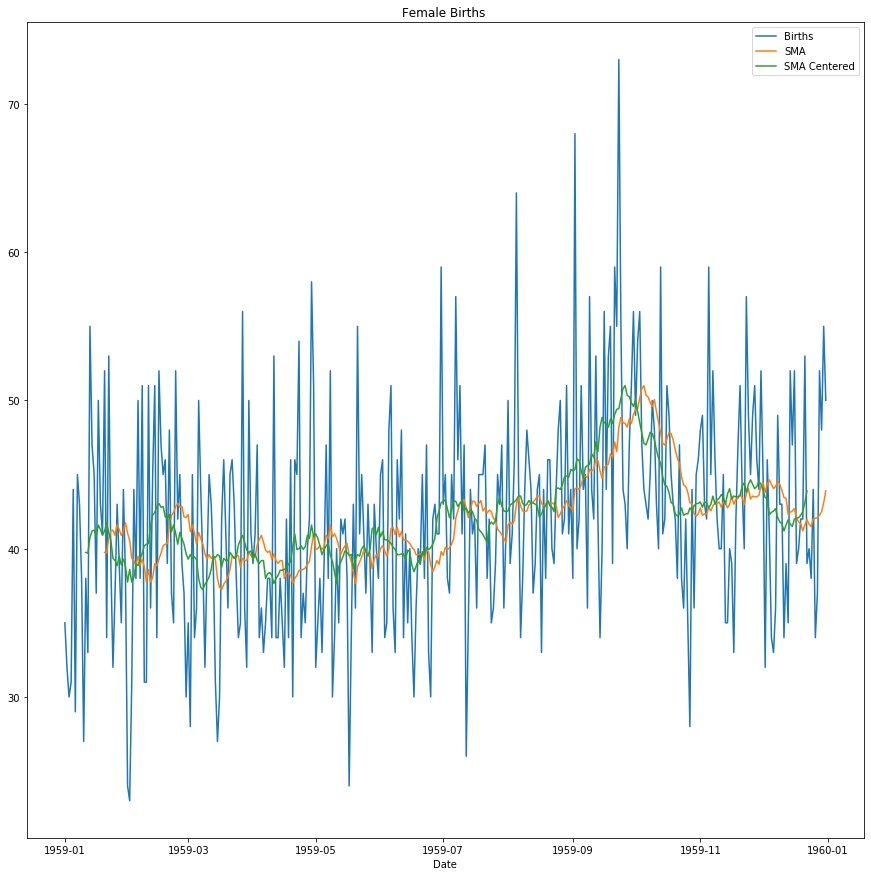

In [0]:
import numpy as np
import matplotlib.pyplot as plt
date=series.index
import datetime
rolling_mean = series.rolling(window=20).mean()
rolling_mean_center = series.rolling(window=20,center=True).mean()
print( datetime.datetime.strptime(date[0], '%Y-%m-%d'))
newdate=[datetime.datetime.strptime(x, '%Y-%m-%d') for x in date]


fig, ax = plt.subplots(figsize=(15,15))
#ax=fig.add_subplot(111)
ax.plot(newdate, series['Births'],label='Births')
ax.plot(newdate, rolling_mean['Births'],label='SMA')
ax.plot(newdate, rolling_mean_center['Births'],label='SMA Centered')
ax.legend(loc="upper right")
ax.set_title('Female Births ')
ax.set_xlabel('Date')
plt.show()

You will see that if you vary the window size the SMA and SMA_centered will become smoother and smoother. It's important not to remove all the fluctuations as you will get rid of both the noise and the original signal by doing this. 

Many people ask the question of how to pick a window size. It is very much up to the practitoner. Generally, I would look at the natural windows or obvious periods. It could be 7 days in a sliding week. So maybe sales in a business are in 7 day cycles. So they may be high on a Friday and low mid-week. In such a case you would always want to have each day in your moving average.This in practice is similar to examining the auto-correlation between lagged data points.  Based on the range you get from the variogram analysis you define your window size equal to the size of the range. I won't go into this here but if you are interested, you can go [here](https://help.rockware.com/rockworks17/WebHelp/gridding_krig_variogram.htm) to understand how it works. 

Another approach is to examine the noise to signal ratio for the signal over differing window sizes. A simple calculation of this is to use the Sum of the Absolute Deviations. The formula is as follows:

>> $SAD_j=  \frac{\sum_{i=j}^n \left\lvert (X_i - SMA_{ji}) \right\lvert}{n-j} $

This is a very easy way to compare the relative reduction in noise with increasing window sizes. A pattern should show up and it should look like a knee curve. The window size would most likely be the point in the knee curve where it flattens out. 



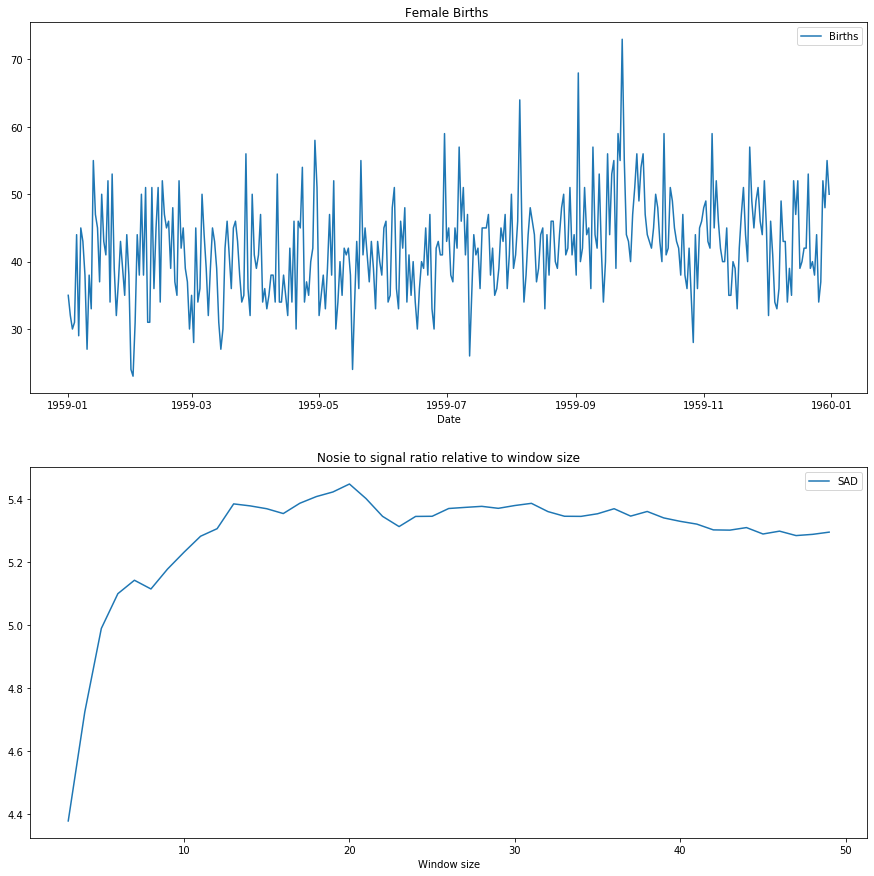

In [0]:

fig,(ax1,ax2) = plt.subplots(2,1,figsize=(15,15))
ax1.plot(newdate, series['Births'],label='Births')
#ax[0,1].plot(newdate, series['Births'],label='Births')


sad=[]
window_size=[]
for i in range(3,50):
  rolling_mean = series.rolling(window=i).mean()
  sad.append((sum(abs(rolling_mean['Births'][(i-1):]-series['Births'][(i-1):] )))/(len(rolling_mean.Births)-i))
  window_size.append(i)

ax2.plot(window_size, sad,label='SAD')
ax2.legend(loc="upper right")
ax2.set_title('Nosie to signal ratio relative to window size')
ax2.set_xlabel('Window size')
ax2.set_ylabel('')
ax1.legend(loc="upper right")
ax1.set_title('Female Births ')
ax1.set_xlabel('Date')
plt.show()

# **Exponential Smoothing**
In the Simple Moving Average approach, we assume that each point in our window is of equal weight or importance. This is a major assumption. For example, stock market prices do not follow this rule. Generally, your price today is a function of what it was yesterday. Also, the effect of your price on future prices decays over time. 
Exponential Moving Average (EMA) and Simple Moving Average (SMA) are similar in that they help us dampen noise in our features. The two averages are also similar because they are interpreted in the same manner and are both commonly used by technical traders to smooth out price fluctuations.
Both methods are also regularly used as predictive models for time series data. In most cases the assumptions are too simplistic, however, using them to reduce the noise effect as an input variable is not.

For Exponential Smoothing the raw data sequence is often represented by {$x_{t}$} beginning at time $t=0$, and the output of the exponential smoothing algorithm is commonly written as {$s_{t}$}, which may be regarded as the best estimate of what the next value of $x$ will be. When the sequence of observations begins at time $t=0$, the simplest form of exponential smoothing (Simple Exponential Smoothing) is given by the formulas:

>>$S_0=x_0$

>>$S_t={\alpha}x_t + (1-\alpha)S_{t-1} $ for $t > 3$

Where $\alpha$ is a smoothing factor, and $0 < \alpha < 1 $ 

In this approach, we choose the value of $\alpha$ which minimises the MSE $\sum_{i=1}^n(x_i-S_i)^2$ This is not a straight forward problem as the MSE function is highly nonlinear. Go to the [Engineering statistics handbook](https://www.itl.nist.gov/div898/handbook/pmc/section4/pmc431.htm) and you will find a detailed explanation of how the $\alpha$ parameter can be calculated.

When there is a trend in your data the [Holts Winters](https://pdfs.semanticscholar.org/6b6b/e8acb6cab384296af67d636dda0891d5302a.pdf) method is more appropriate, as it will take account of the trend as well as the autocorrelation between time points.







#**Example**

We will now look at an example of how to apply Simple Exponential Smoothing using python on the data from the example used in Simple Moving Average smoothing. In this example, we also put the SMA calculated from SAD with a window size of 10.

In [0]:
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials
# Authenticate and create the PyDrive client.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [0]:
import pandas as pd

downloaded = drive.CreateFile({'id':'1V5ONam3aM_TdOF7mNSrhjmCp2P6YADgX'}) 
downloaded.GetContentFile('daily_female_births.csv')  
series = pd.read_csv('daily_female_births.csv',encoding = "utf-8",header=0, index_col=0)

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


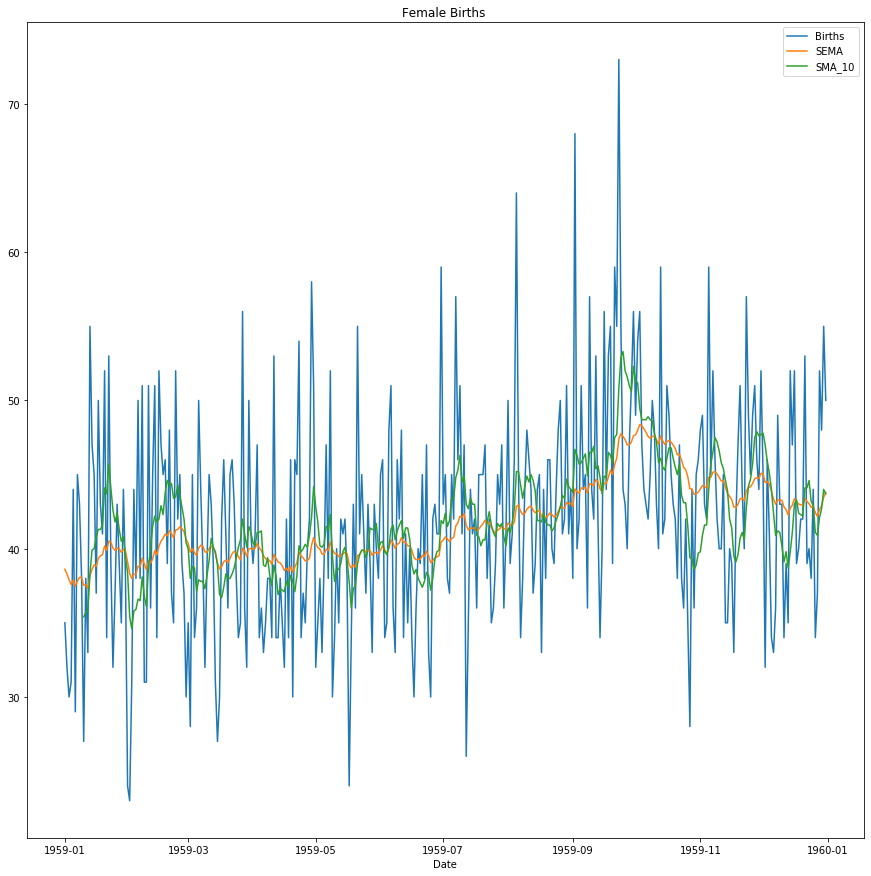

In [0]:
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.holtwinters import ExponentialSmoothing

from statsmodels.tsa.holtwinters import SimpleExpSmoothing
# prepare data
date=series.index
newdate=[datetime.datetime.strptime(x, '%Y-%m-%d') for x in date]
# create class
model = SimpleExpSmoothing(series['Births'])
#model2=ExponentialSmoothing(series['Births'],trend="additive", damped=True, seasonal="additive", seasonal_periods=60)

# fit model
model_fit = model.fit()
#model_fit = model2.fit()
# make prediction
yhat = model_fit.predict(1,len(series.Births))
#print(yhat)

rolling_mean = series.rolling(window=10).mean()





fig, ax = plt.subplots(figsize=(15,15))
#ax=fig.add_subplot(111)
ax.plot(newdate, series.Births,label='Births')
ax.plot(newdate, yhat,label='SEMA')
ax.plot(newdate, rolling_mean.Births,label='SMA_10')

ax.legend(loc="upper right")
ax.set_title('Female Births ')
ax.set_xlabel('Date')
plt.show()

# **Review**

Looking at the above output we can see that the SMA window that was closest to the SEMA was close to 20. This is a little high as the SAD figure suggested a window of 10. In this particular situation, the optional $\alpha$ for the SEMA was possibly over dampening the signal. If you use the SMVA with a window of 10 as suggested, we can see very obvious repeating/cyclical effects, which happen every 2 months. 

In this case, Simple Exponential Smoothing may not have been the best choice, as it does not take account of seasonal patterns. 

If you look closely you will see a "model2" which is effectively a Holts Winter approach. Go to the following [link](https://www.statsmodels.org/dev/generated/statsmodels.tsa.holtwinters.ExponentialSmoothing.html#statsmodels.tsa.holtwinters.ExponentialSmoothing) and see if you can interpret and justify the parameters in the model. 

Try it out and see what results you get. Do the parameters make sense? 

Let us know in the comments section for Step 3.9 on FutureLearn [here]( https://www.futurelearn.com/courses/pre-processing-data-and-feature-impact-calculation/1/steps/688133).